# 1<sup>η</sup> Εργαστηριακή Άσκηση
## Ανάλυση & Μελέτη Σύνθετων Τοπολογιών Δικτύου

<p style='text-align: justify;'> Στην παρούσα άσκηση θα δημιουργηθούν και θα αναλυθούν τοπολογίες, ορισμένες από τις οποίες χρησιμοποιούνται για την αναπαράσταση σύνθετων ή/και κοινωνικών δικτύων. Η ανάλυση θα γίνει μέσω των μετρικών ανάλυσης που παρουσιάστηκαν στις διαλέξεις του μαθήματος. Τα δίκτυα που θα μελετηθούν δίνονται στον Πίνακα 1.</p>

<table width="80%">
    <caption>Πίνακας $1$: Σύνθετα δίκτυα και χαρακτηριστικές παράμετροι</caption>
    <thead>
    <tr>
        <th>Τύπος Δικτύου</th>
        <th>Μοντέλο</th>
        <th>Αναγνωριστικό</th>
        <th>Παράμετροι</th>
    </tr>
    </thead>
    <tbody>
        <tr>
            <td rowspan="2">Πλέγμα</td>
            <td rowspan="2">Πεπερασμένο</td>
            <td rowspan="2">REG</td>
            <td>Κόμβοι $n$</td>   
        </tr>
        <tr>
            <td>Bαθμός $d$</td>
        </tr>
        <tr>
            <td rowspan="2">Τυχαίος γράφος</td>
            <td rowspan="2">Erdos-Renyi</td>
            <td rowspan="2">RG (ER)</td>
            <td>Κόμβοι $n$</td>   
        </tr>
        <tr>
            <td>Συνδέσεις $M$</td>
        </tr>
        <tr>
            <td rowspan="2">Τυχαίος γράφος</td>
            <td rowspan="2">Gilbert</td>
            <td rowspan="2">RG (G)</td>
            <td>Κόμβοι $n$</td>   
        </tr>
        <tr>
            <td>Πιθανότητα σύνδεσης $p$</td>
        </tr>
        <tr>
            <td rowspan="3">Τυχαίος γεωμετρικός γράφος</td>
            <td rowspan="3">Επίπεδος</td>
            <td rowspan="3">RGG</td> 
        </tr>
        <tr>
            <td >Ακτίνα $R$</td>
        </tr>
        <tr>
            <td>Κόμβοι $n$</td>  
        </tr>
        <tr>
            <td rowspan="2">Scale-free</td>
            <td rowspan="2">Barabasi-Albert</td>
            <td rowspan="2">SF (BA)</td>
            <td>Κόμβοι $n$</td>   
        </tr>
        <tr>
            <td>Παράμετρος επισύναψης $d$</td>
        </tr>
        <tr>
            <td rowspan="3">Small-world</td>
            <td rowspan="3">Watts-Strogatz</td>
            <td rowspan="3">SW (WS)</td>
            <td>Κόμβοι $n$ </td>   
        </tr>
        <tr>
            <td >Βαθμός αρχικού πλέγματος $d$</td>
        </tr>
        <tr>
            <td>Πιθανότητα ανασύνδεσης $g_p$</td>  
        </tr>
    </tbody>
</table>

In [1]:
# seed number, DO NOT CHANGE IT!
# i had to change it to 601, check out note at the end of section A
seedno=601

In [2]:
%matplotlib inline
import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

## Α. Κατασκευή και οπτικοποίηση σύνθετων τύπων δικτύου

### Τοπολογία REG για βαθμό πλέγματος $d = 4$

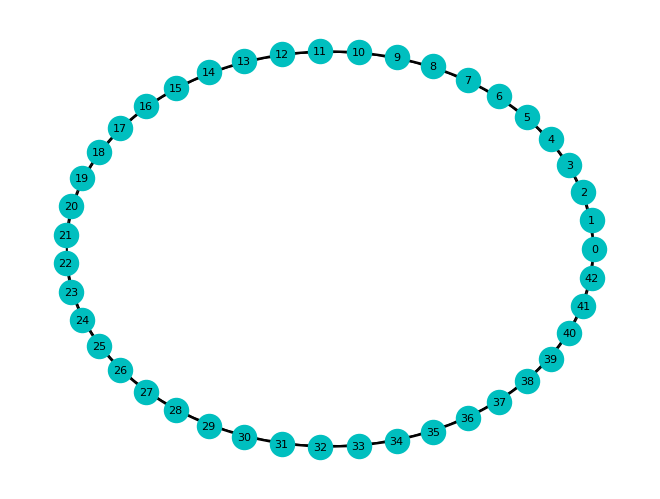

In [3]:
random.seed(seedno)
# n=4x μέγεθος δικτύου: αντικαταστήστε το x με το τελευταίο ψηφίο του αριθμού μητρώου σας
n=43
d=4
# για την κατασκευή του REG χρησιμοποιήστε την watts_strogatz_graph από το networkx
# επιλέξτε προσεκτικά την τιμή της παραμέτρου p
REG=nx.watts_strogatz_graph(n, d, 0, seed=seedno)

# οπτικοποίηση: χρησιμοποιήστε την draw_circular από το networkx
nx.draw_circular(REG, with_labels=True, node_color='c', node_size=300, font_size=8)

### Τοπολογία RG (ER) για αριθμό συνδέσεων $M = 150$

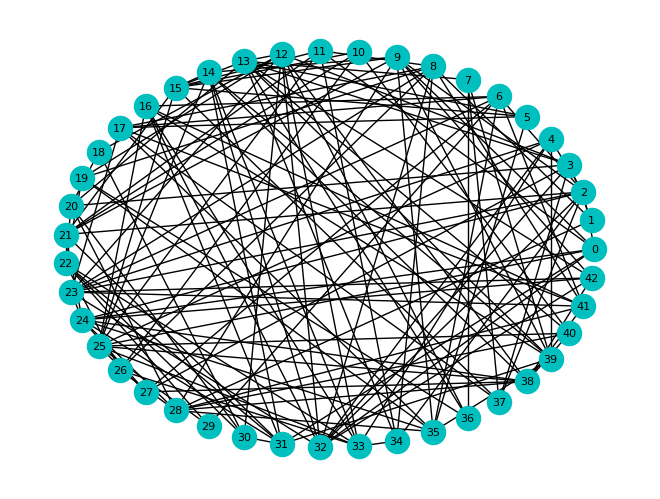

In [4]:
random.seed(seedno)
n=43 
M=150

# για την κατασκευή του RGER χρησιμοποιήστε την gnm_random_graph από το networkx
RGER=nx.gnm_random_graph(n, M, seed=seedno)

# οπτικοποίηση: χρησιμοποιήστε την draw_circular από το networkx
nx.draw_circular(RGER, with_labels=True, node_color='c', node_size=300, font_size=8)

### Τοπολογία RGG  με ακτίνα σύνδεσης $R=0.35$

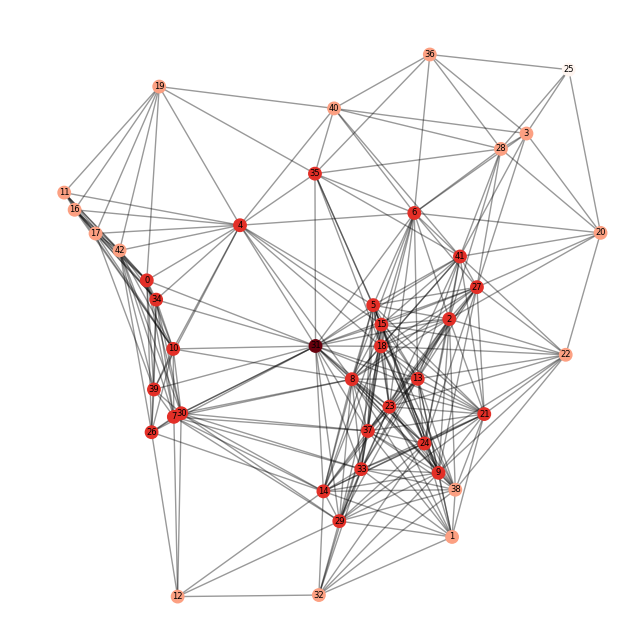

In [5]:
random.seed(seedno)
n=43
R=0.35

# για την κατασκευή του RGG χρησιμοποιήστε την random_geometric_graph από το networkx
RGG=nx.random_geometric_graph(n, R, seed=seedno)

# οπτικοποίηση: https://networkx.org/documentation/stable/auto_examples/drawing/plot_random_geometric_graph.html

# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(RGG, "pos")

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(RGG, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(RGG, pos, alpha=0.4)
nx.draw_networkx_nodes(
    RGG,
    pos,
    nodelist=list(p.keys()),
    node_size=80,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r,
)
nx.draw_networkx_labels(RGG, pos, font_size=6)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.show()

### Τοπολογία SF με παράμετρο επισύναψης $d=4$

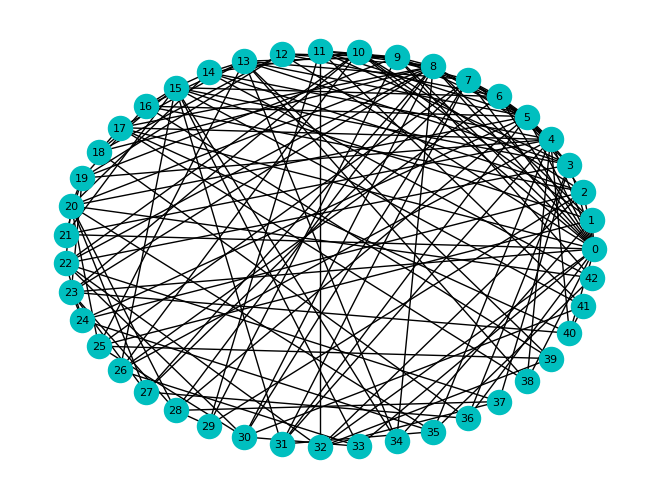

In [6]:
random.seed(seedno)
n=43
d=4

# για την κατασκευή του SF χρησιμοποιήστε την barabasi_albert_graph από το networkx
SF=nx.barabasi_albert_graph(n, d, seed=seedno)

# οπτικοποίηση: χρησιμοποιήστε την draw_circular από το networkx
nx.draw_circular(SF, with_labels=True, node_color='c', node_size=300, font_size=8)

### Τοπολογία SW με βαθμό αρχικού πλέγματος $d=4$ και πιθανότητα ανασύνδεσης $p=0.25$

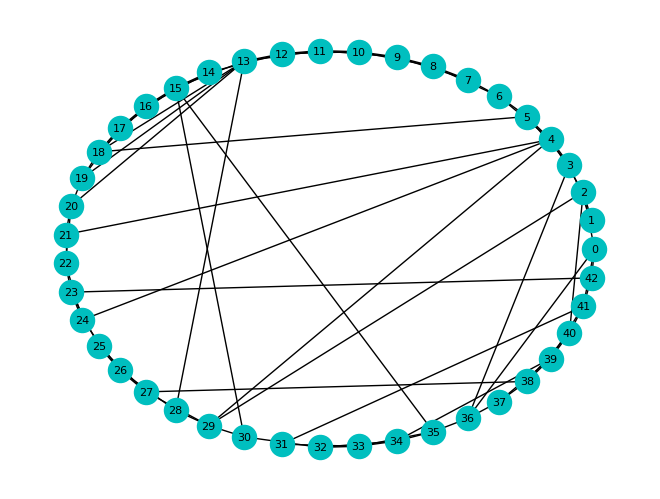

In [7]:
random.seed(seedno)
n=43
d=4
p=0.25

# για την κατασκευή του SW χρησιμοποιήστε την watts_strogatz_graph από το networkx
SW=nx.watts_strogatz_graph(n, d, p, seed=seedno)

# οπτικοποίηση: χρησιμοποιήστε την draw_circular από το networkx
nx.draw_circular(SW, with_labels=True, node_color='c', node_size=300, font_size=8)

### NOTE: There was an error with the given seedno=600, as the 2nd graph (RGER) was disconnected, with node 14 being alone. This resulted in infinite path length errors in various networkx functions (such as diameter, radius etc). Therefore, I had to change the seedno to 601, for which all graphs are connected, as shown by the following check.

In [8]:
graphs = {REG: "REG", RGER: "RGER", RGG: "RGG", SF: "SF", SW: "SW"}

# check connectedness
for G in graphs:
    if nx.is_connected(G):
        print("-", graphs[G], "is connected")
    else:
        print("-", graphs[G], "is not connected")

- REG is connected
- RGER is connected
- RGG is connected
- SF is connected
- SW is connected


## B. Μετρικές δικτύου

### B1. Συντελεστής ομαδοποίησης (Clustering coefficient)

#### Για κάθε μια από τις τοπολογίες REG, RG(ER), RGG, SF(BA) και SW(WS):
#### Β1.1 Να υπολογιστεί ο συντελεστής ομαδοποίησης κάθε κόμβου και να αναπαρασταθεί η κατανομή του.
#### Β1.2  Να υπολογιστεί ο μέσος συντελεστής ομαδοποίησης και η διασπορά του.
#### Β.1.3 Να βρεθούν οι κόμβοι με το μικρότερο και το μεγαλύτερο συντελεστή ομαδοποίησης. 
#### Να σχολιαστούν τα αποτελέσματα.

REG
- Average clustering coefficient: 0.5
- Variance of clustering coefficient: 0.0
- Minimum clustering coefficient: 0.5
- Nodes with minimum clustering coefficient: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
- Maximum clustering coefficient: 0.5
- Nodes with maximum clustering coefficient: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]


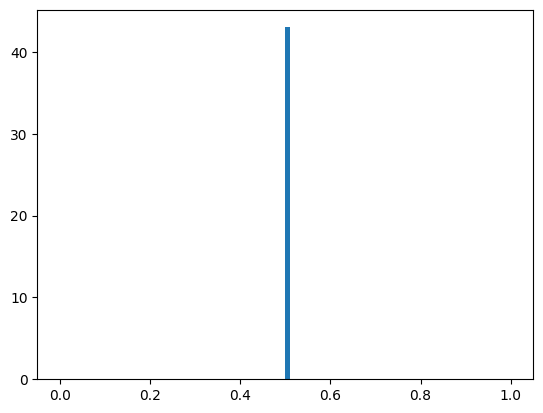

----------------------------------------------------------
RGER
- Average clustering coefficient: 0.20901875901875905
- Variance of clustering coefficient: 0.014646918868201464
- Minimum clustering coefficient: 0
- Nodes with minimum clustering coefficient: [1, 29, 37]
- Maximum clustering coefficient: 0.6666666666666666
- Nodes with maximum clustering coefficient: [18]


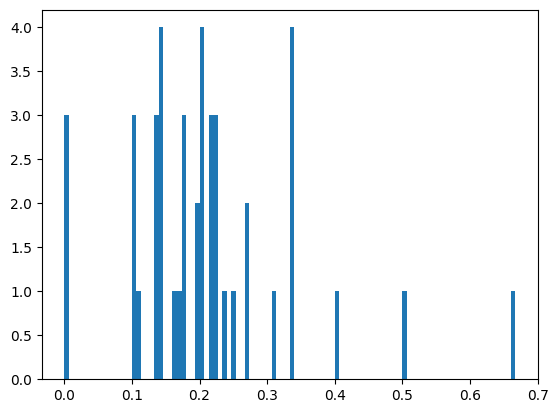

----------------------------------------------------------
RGG
- Average clustering coefficient: 0.7185560468172294
- Variance of clustering coefficient: 0.012167719933043813
- Minimum clustering coefficient: 0.4411764705882353
- Nodes with minimum clustering coefficient: [4]
- Maximum clustering coefficient: 0.9393939393939394
- Nodes with maximum clustering coefficient: [1]


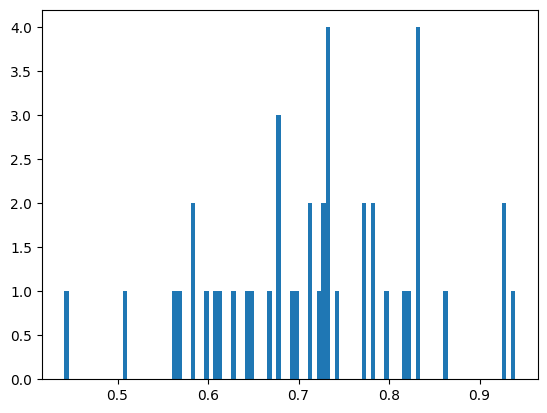

----------------------------------------------------------
SF
- Average clustering coefficient: 0.23969577953666085
- Variance of clustering coefficient: 0.014888733137342914
- Minimum clustering coefficient: 0
- Nodes with minimum clustering coefficient: [41]
- Maximum clustering coefficient: 0.6666666666666666
- Nodes with maximum clustering coefficient: [38]


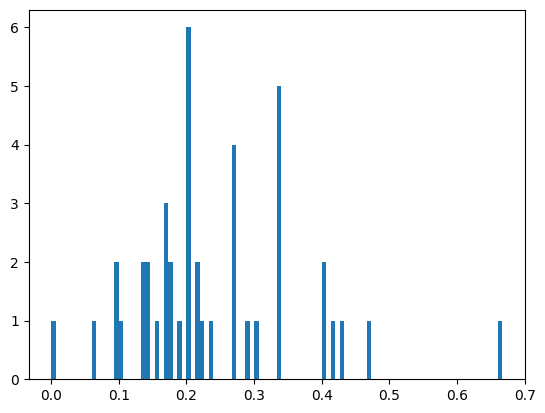

----------------------------------------------------------
SW
- Average clustering coefficient: 0.27331118493909196
- Variance of clustering coefficient: 0.02656029060263009
- Minimum clustering coefficient: 0
- Nodes with minimum clustering coefficient: [1, 28, 30, 31, 36]
- Maximum clustering coefficient: 0.6666666666666666
- Nodes with maximum clustering coefficient: [7]


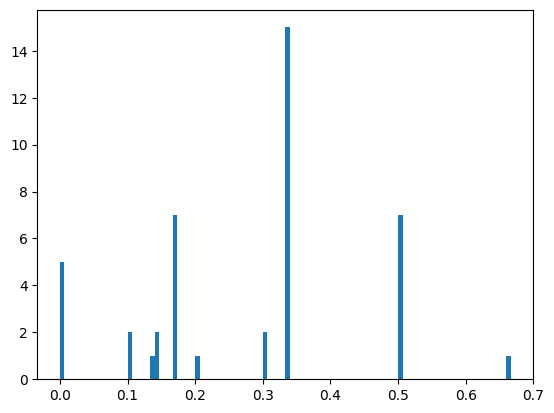

In [9]:
def cc(G):
    # calculate the clustering coefficients of G's nodes and plot them on a histogram
    ccs = nx.clustering(G).values()
    plt.hist(ccs, bins=100)

    # calculate the average clustering coefficient and its variance
    avg_cc = nx.average_clustering(G)
    var_cc = np.var(list(ccs))

    # find the nodes with min and max values of clustering coefficient
    min_cc = min(ccs)
    min_nodes = [node for node in G.nodes if nx.clustering(G, node) == min_cc]

    max_cc = max(ccs)
    max_nodes = [node for node in G.nodes if nx.clustering(G, node) == max_cc]

    return avg_cc, var_cc, min_cc, min_nodes, max_cc, max_nodes

for G in graphs:
    avg_cc, var_cc, min_cc, min_nodes, max_cc, max_nodes = cc(G)

    print(graphs[G])
    print("- Average clustering coefficient:", avg_cc)
    print("- Variance of clustering coefficient:", var_cc)
    print("- Minimum clustering coefficient:", min_cc)
    print("- Nodes with minimum clustering coefficient:", min_nodes)
    print("- Maximum clustering coefficient:", max_cc)
    print("- Nodes with maximum clustering coefficient:", max_nodes)
    plt.show()
    if G != SW:
        print("----------------------------------------------------------")

#### Results Review

- Firstly a **NOTE** that values such as clustering coefficient or degree centrality etc. later on, are all normalized by the respective maximum achievable value.

- On the **REG** graph, all nodes have a CC of 0.5, as expected due to the symmetry of the ring topology and d=4, resulting in a mean of 0.5. Therefore, the variance is 0 and both minimum and maximum CCs are equal to 0.5 with every node having that value.

- On the **RGER** graph, where the clustering is lower, the CC distribution is covering mainly the 0.1-0.3 area and is around the mean of 0.21. The variance is low and around 0.015, while the minimum and maximum CCs are equal to 0 and 0.66 respectively. The minimum is for nodes 1, 29 and 37, that have no established connections between their neighbors, while the maximum is for node 18, that has the highest percentage of established connections between its neighbors versus available ones between them.

- On the **RGG** graph, the clustering seems higher than the previous graphs, with the CC distribution covering the 0.55-0.85 area and the mean being around 0.72. The variance is low, around 0.012 and the minimum and maximum CCs are equal to 0.44 and 0.94 respectively. The minimum is for node 4, while the maximum is for node 1.

- On the **SF** graph, the clustering is low and the CC distribution is covering the 0.1-0.35 area, with the mean being around 0.24. The variance is again low, around 0.015 and the minimum and maximum CCs are equal to 0 and 0.66 respectively. The minimum is for node 41 that has no established connections between its neighbors, while the maximum is for node 38, that probably has a connection to biger hubs with a higher chance for its neighbors to be connected.

- On the **SW** graph, the clustering is again low, mainly due to the low rewiring probability, equal to 0.25. The CC distribution is covering a larger area with values mainly around but not limited to the 0.1-0.35 area. The mean is around 0.27 and the variance is almost double the previous values, around 0.027, because of the low rewiring probability again, and the higher spread of the CC values. The minimum and maximum CCs are equal to 0 and 0.66 respectively. The minimum is for nodes 1, 28, 30, 31 and 36 that have no established connections between their neighbors, while the maximum is for node 7.

### Β2. Μέσο μήκος μονοπατιού - Διάμετρος - Ακτίνα γράφου

#### Για κάθε μια από τις τοπολογίες REG, RG(ER), RGG, SF(BA) και SW(WS):
#### Β2.1 Nα υπολογιστεί το μέσο μήκος μονοπατιού και η διασπορά του. Προτείνεται η χρήση της συνάρτησης  all_pairs_shortest_path_length του networkx.
#### B2.2 Να υπολογιστεί η διάμετρος (συνάρτηση diameter) και η ακτίνα (συνάρτηση radius).
#### Για τα παραπάνω πραγματοποιήστε συγκρίσεις και εξηγήστε με βάση τα χαρακτηριστικά της κάθε τοπολογίας όπως παρουσιάζονται στη θεωρία.

In [10]:
def compute_path_lengths(G):
    # create a list containing the path lengths of the shortest paths for every node pair in G
    path_lengths = []
    for u,v in nx.all_pairs_shortest_path_length(G):
        path_lengths.extend(v.values())

    # calculate the average path length and its variance
    average_path_length = np.mean(path_lengths)
    path_length_variance = np.var(path_lengths)

    return average_path_length, path_length_variance

def compute_diameter_and_radius(G):
    # calculate the diameter and radius of G
    diameter = nx.diameter(G)
    radius = nx.radius(G)

    return diameter, radius

for G in graphs:
    average_path_length, path_length_variance = compute_path_lengths(G)
    diameter, radius = compute_diameter_and_radius(G)
       
    print(graphs[G])
    print("- Average path length:", average_path_length)
    print("- Path length variance:", path_length_variance)
    print("- Diameter:", diameter)
    print("- Radius:", radius)
    if G != SW:
        print("----------------------------------------------------------")


REG
- Average path length: 5.627906976744186
- Path length variance: 9.768523526230394
- Diameter: 11
- Radius: 11
----------------------------------------------------------
RGER
- Average path length: 2.063818280151433
- Path length variance: 0.5345967782272206
- Diameter: 4
- Radius: 3
----------------------------------------------------------
RGG
- Average path length: 1.8939967550027041
- Path length variance: 0.7448476819797349
- Diameter: 5
- Radius: 3
----------------------------------------------------------
SF
- Average path length: 1.9913466738777719
- Path length variance: 0.4682863963126255
- Diameter: 3
- Radius: 2
----------------------------------------------------------
SW
- Average path length: 3.097890751757707
- Path length variance: 1.6718668328457844
- Diameter: 6
- Radius: 4


#### Results Review

- We know that the more clustered a graph, the less the **average path length**. That is confirmed by the results, as the RGG graph that had the highest average clustering coefficient, 0.72, also had the lowest average path length, 1.89, even though RGG graphs do not typically have small average path lengths. SF, which usually has smaller average path lengths than a RG, and RGER are following closely with 1.99 and 2.06 respectively. Next is SW with 3.09 and even though Small World graphs tend to have small average path lengths, here the rewiring probability is equal to only 0.25, resulting in a long average path length. The longest one was achieved by REG with 5.63, as expected due to the ring topology of the graph.

- **Path length variance** is extremely high for the REG graph, because of the higher clustering between neighbors but not between nodes that are more than d/2 nodes away. Next is SW with a high variance of 1.67, due to the low rewiring probability, while the other 3 graphs, RGG, RGER, SF achieve a lower variance of 0.74, 0.53 and 0.47 respectively.

- As for the **diameter** and **radius**, it is expected that they are the highest for the REG graph and equal to each other due to the symmetry of the topology and every node having the same eccentricity (both are 11). Up next is SW with a diameter of 6 and radius of 4, while the lowest diameter and radius pair is for the SF graph with 3 and 2 respectively, because of the nodes that have multiple connections. RGER and RGG score somewhere in the middle with a diameter of 4 and 5 respectively and a radius of 3 for both of them.

#### B.2.3 Για κάθε τοπολογία, ποιος κόμβος συνδέεται με τους περισσότερους κόμβους με μήκος ελάχιστου μονοπατιού ίσο με τη διάμετρο της τοπολογίας? Να προσδιοριστεί το label του κόμβου και το σύνολο των κόμβων με τους οποίους συνδέεται με μήκος ελάχιστου μονοπατιού ίσο με τη διάμετρο.

In [11]:
def find_nodes(G):
    # find the diameter of G
    path_lengths = []  
    for u,v in nx.all_pairs_shortest_path_length(G):
        path_lengths.extend(v.values())
    diameter = max(path_lengths)

    # find the node that has most connections with minimum path length equal to the diameter of G
    aux = []
    for u,v in nx.all_pairs_shortest_path_length(G):
        for key, value in v.items():
            if value == diameter:
                aux.append(key)
    node = max(set(aux), key=aux.count)
    
    # find the set of nodes that are connected to this node with minimum path length equal to the diameter of G
    nodes = []
    for u,v in nx.all_pairs_shortest_path_length(G):
        for key, value in v.items():
            if value == diameter and key == node:
                nodes.append(u)

    return node, nodes

for G in [REG, RGER, RGG, SF, SW]:
    node, nodes = find_nodes(G)

    print(graphs[G])
    print("- The node with most connections with minimum path length equal to the diameter of the graph is:", node)
    print("- The set of nodes that are connected with this node with minimum path length equal to the diameter of the graph is:", nodes)
    if G != SW:
        print("----------------------------------------------------------")

REG
- The node with most connections with minimum path length equal to the diameter of the graph is: 0
- The set of nodes that are connected with this node with minimum path length equal to the diameter of the graph is: [21, 22]
----------------------------------------------------------
RGER
- The node with most connections with minimum path length equal to the diameter of the graph is: 7
- The set of nodes that are connected with this node with minimum path length equal to the diameter of the graph is: [26, 29]
----------------------------------------------------------
RGG
- The node with most connections with minimum path length equal to the diameter of the graph is: 25
- The set of nodes that are connected with this node with minimum path length equal to the diameter of the graph is: [12]
----------------------------------------------------------
SF
- The node with most connections with minimum path length equal to the diameter of the graph is: 37
- The set of nodes that are connect

#### Περιφέρεια του γράφου ορίζεται να είναι το σύνολο των κόμβων του που έχουν εκκεντρότητα ίση με τη διάμετρό του. 
#### Κέντρο του γράφου ορίζεται να είναι το σύνολο των κόμβων του που έχουν εκκεντρότητα ίση με την ακτίνα του.  
#### Β.2.4 Για κάθε τοπολογία, να βρεθεί η περιφέρεια και το κέντρο της και να σχολιαστούν τα αποτελέσματα.

In [12]:
def find_periphery(G):
    # find the periphery of G
    return nx.periphery(G)

def find_center(G):
    # find the center of G
    return nx.center(G)

for G in graphs:
    periphery = find_periphery(G)
    center = find_center(G)
    
    print(graphs[G])
    print("- The periphery of the graph is:", periphery)
    print("- The center of the graph is:", center)
    if G != SW:
        print("----------------------------------------------------------")

REG
- The periphery of the graph is: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
- The center of the graph is: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
----------------------------------------------------------
RGER
- The periphery of the graph is: [1, 7, 10, 11, 18, 26, 29]
- The center of the graph is: [0, 2, 3, 4, 5, 6, 8, 9, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
----------------------------------------------------------
RGG
- The periphery of the graph is: [12, 25]
- The center of the graph is: [2, 4, 5, 6, 8, 9, 13, 15, 18, 21, 22, 23, 24, 27, 31, 33, 35, 37, 38, 41]
----------------------------------------------------------
SF
- The periphery of the graph is: [1, 2, 3, 4

#### Results Review

- On the **REG** graph, all nodes belong to the periphery and the center sets, since all of them have eccentricity equal to 11, due to the symmetry of the topology.

- On the **RGER** graph, all nodes belong to either the periphery or the center set, while most of them belong to the second one. That means that most nodes have eccentricity equal to the radius of the graph, while the rest have eccentricity equal to the diameter of the graph.

- On the **RGG** graph, only 2 nodes (that are on the bottom-left and top-right corners of the graph) belong to the periphery set, while a lot of the red colored nodes that are around the center of the graph belong to the center set, with most light orange ones missing from it.

- On the **SF** graph, all nodes but two, nodes 0 and 5, belong to the periphery set. The 2 nodes that belong to the center set seem to be around bigger hubs of nodes.

- On the **SW** graph, the periphery of the graph has 14 nodes, while the center of the graph has 6 nodes, all of which have at least one rewiring connection.

- For every graph we can also see that the periphery set includes all the nodes listed on the above question, meaning the node with most connections with minimum path length equal to the diameter of the graph and the set of nodes that are connected with this node with the previous constraint in mind.

## Γ) Mετρικές κεντρικότητας κόμβων

### Γ1. Κεντρικότητα βαθμού (Degree centrality)
##### Γ1.1 Να αναπαρασταθεί η κατατανομή βαθμών κόμβων για κάθε τοπολογία.
##### Γ1.2 Να υπολογιστεί ο μέσος βαθμός κόμβου καθώς και η διασπορά των βαθμών κόμβου για κάθε τοπολογία.
##### Να σχολιαστούν τα αποτελέσματα.

REG
- Average degree centrality: 0.09523809523809523
- Variance of degree centrality: 0.0


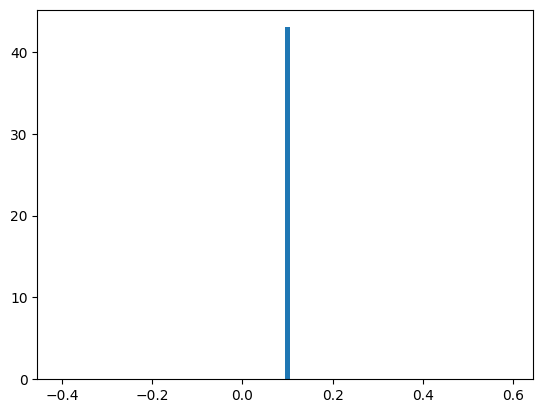

----------------------------------------------------------
RGER
- Average degree centrality: 0.1661129568106312
- Variance of degree centrality: 0.0029132619335817973


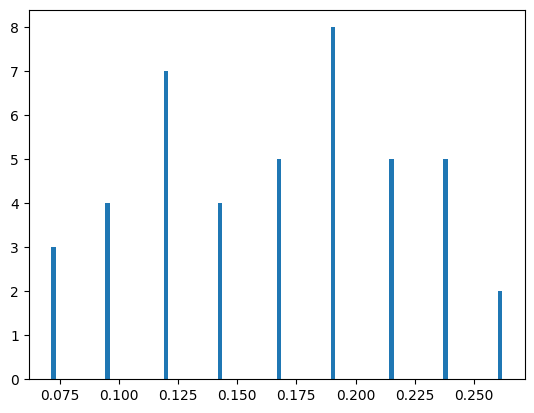

----------------------------------------------------------
RGG
- Average degree centrality: 0.3388704318936877
- Variance of degree centrality: 0.016290597724577482


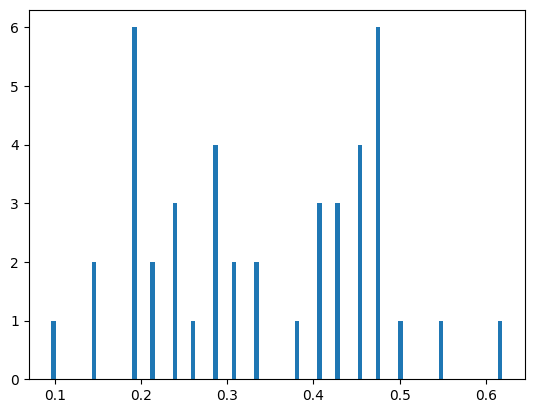

----------------------------------------------------------
SF
- Average degree centrality: 0.17275747508305644
- Variance of degree centrality: 0.007121579477292988


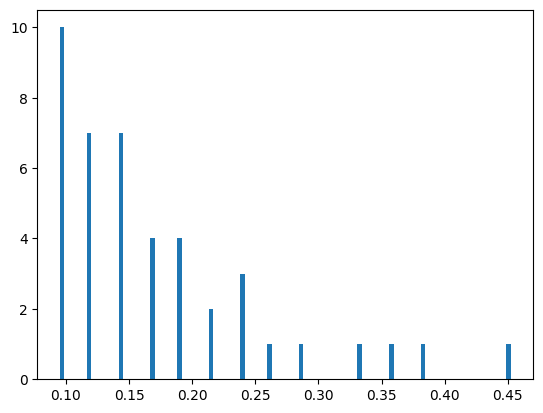

----------------------------------------------------------
SW
- Average degree centrality: 0.09523809523809523
- Variance of degree centrality: 0.0005800769920371248


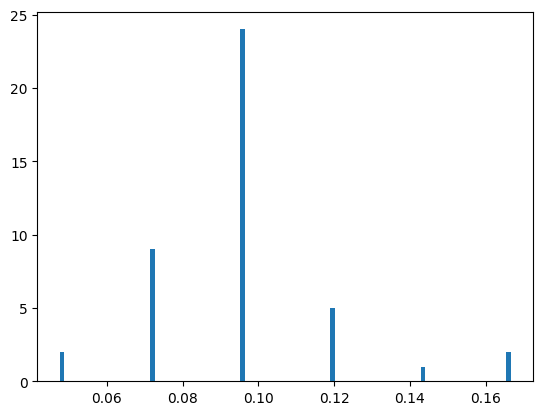

In [13]:
def find_degree(G):
    # calculate the degree of every node in G
    degree_centrality = nx.degree_centrality(G).values()
    plt.hist(degree_centrality, bins=100)

    # calculate the average degree and variance of the degree of every node in G
    average = np.mean(list(degree_centrality))
    variance = np.var(list(degree_centrality))
    return average, variance

for G in graphs:
    average, variance = find_degree(G)
    
    print(graphs[G])
    print("- Average degree centrality:", average)
    print("- Variance of degree centrality:", variance)
    plt.show()
    if G != SW:
        print("----------------------------------------------------------")

#### Results Review

- On the **REG** graph, all the nodes have the same degree centrality, equal to 0.1, since all of them have the same number of neighbors. The variance of the degree centrality is therefore equal to 0.

- On the **RGER** graph, the degree centrality of the nodes is distributed normally, as expected on a random graph, with the average being equal to 0.17 and the variance being low at around 0.003.

- On the **RGG** graph, the degree centrality of the nodes is distributed normally, as we have a random graph again, with the average being rather high, around 0.34 and the variance also sitting high, at around 0.016.

- On the **SF** graph, the degree centrality of the nodes is following a decreasing trend, as expected on a real graph, where most nodes are lowly linked and less are highly linked. The average degree centrality is again equal to 0.17 and the variance is low at around 0.007.

- On the **SW** graph, the degree centrality of the nodes is distributed normally, with an average value of 0.1 again and a really low variance of 0.0006.

### Γ2. Κεντρικότητα εγγύτητας (Closeness centrality)
##### Γ2.1 Να αναπαρασταθεί η κατατανομή της εγγύτητας κόμβων για κάθε τοπολογία.
##### Γ2.2 Να υπολογιστεί η μέση εγγύτητα καθώς και η διασπορά της για κάθε τοπολογία.
##### Να σχολιαστούν τα αποτελέσματα.

REG
- Average closeness centrality: 0.17355371900826447
- Variance of closeness centrality: 0.0


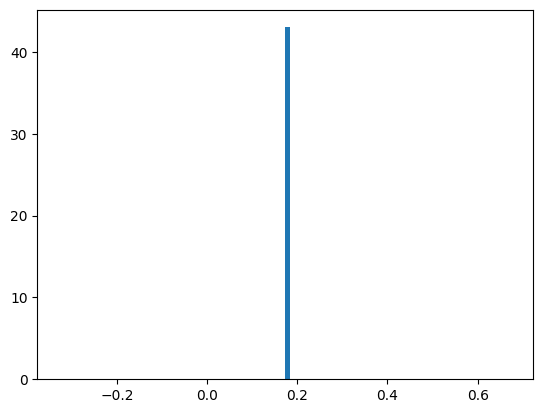

----------------------------------------------------------
RGER
- Average closeness centrality: 0.47651481706381615
- Variance of closeness centrality: 0.0014535182362623808


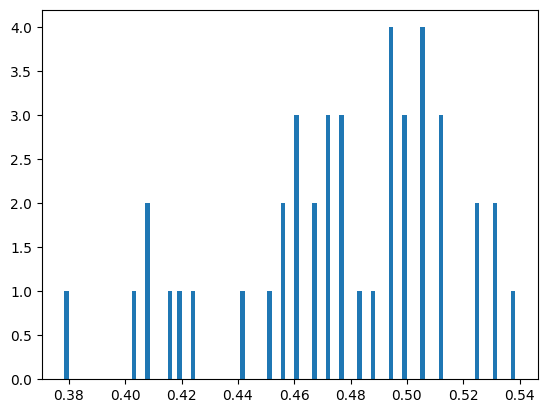

----------------------------------------------------------
RGG
- Average closeness centrality: 0.5295648577141031
- Variance of closeness centrality: 0.006929790909105906


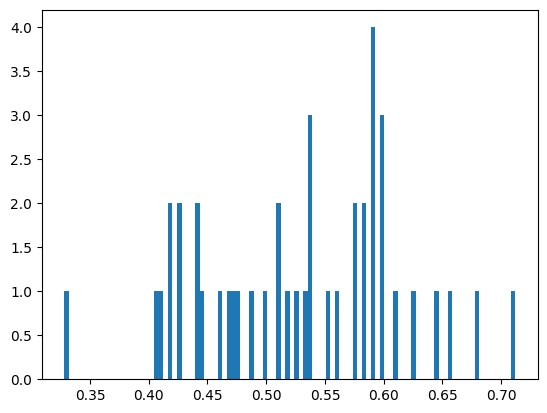

----------------------------------------------------------
SF
- Average closeness centrality: 0.49567026043328843
- Variance of closeness centrality: 0.002728546157501097


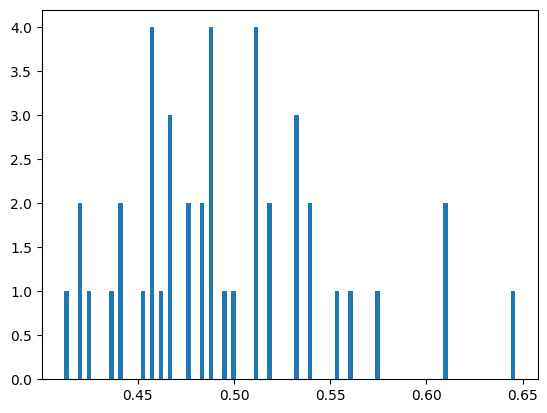

----------------------------------------------------------
SW
- Average closeness centrality: 0.319198926793702
- Variance of closeness centrality: 0.0012857361012110907


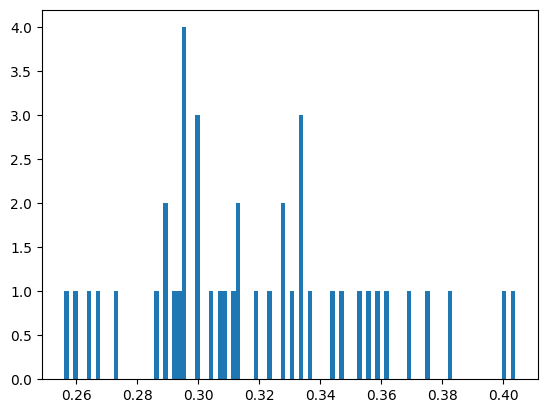

In [14]:
def find_closeness(G):
    # calculate the closeness of every node in G
    closeness_centrality = nx.closeness_centrality(G).values()
    plt.hist(closeness_centrality, bins=100)

    # calculate the average closeness and variance of the closeness of every node in G
    average = np.mean(list(closeness_centrality))
    variance = np.var(list(closeness_centrality))
    return average, variance

for G in graphs:
    average, variance = find_closeness(G)
    
    print(graphs[G])
    print("- Average closeness centrality:", average)
    print("- Variance of closeness centrality:", variance)
    plt.show()
    if G != SW:
        print("----------------------------------------------------------")

#### Results Review

- On the **REG** graph, all the nodes have the same closeness centrality, equal to 0.17, since all of them have the same distance from all the other nodes. The variance of the closeness centrality is therefore equal to 0.

- On the **RGER** graph, the average closeness centrality of the nodes is high, around 0.48, while the variance is rather low at 0.0015. This means that most nodes are close to each other and will receive information fast.

- On the **RGG** graph, the average closeness centrality of the nodes is even higher, around 0.53, with the variance being around 0.007.

- On the **SF** graph, the average closeness centrality of the nodes is also at high levels, around 0.5 with a low variance of 0.003.

- On the **SW** graph, the average closeness centrality of the nodes is lower than the RGER, RGG and SF graphs but higher than the REG graph, around 0.32, while the variance stays low at around 0.001.

### Γ3. Ενδιαμεσική κεντρικότητα (Betweenness centrality)
##### Γ3.1 Να αναπαρασταθεί η κατατανομή της ενδιαμεσικής κεντρικότητας κόμβων για κάθε τοπολογία.
##### Γ3.2 Να υπολογιστεί η μέση ενδιαμεσική κεντρικότητα καθώς και η διασπορά της για κάθε τοπολογία.
##### Να σχολιαστούν τα αποτελέσματα.

REG
- Average betweenness centrality: 0.11614401858304299
- Variance of betweenness centrality: 1.1645157803271658e-34


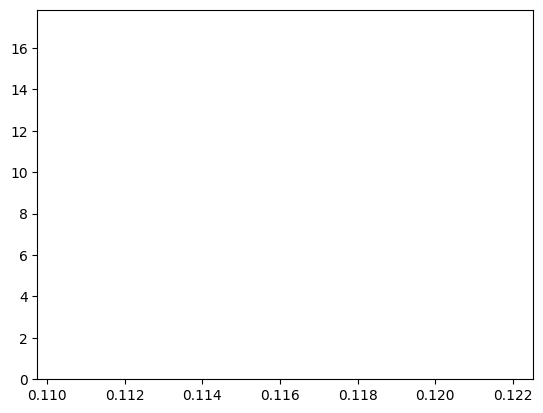

----------------------------------------------------------
RGER
- Average betweenness centrality: 0.02714528806417632
- Variance of betweenness centrality: 0.00038072703037457376


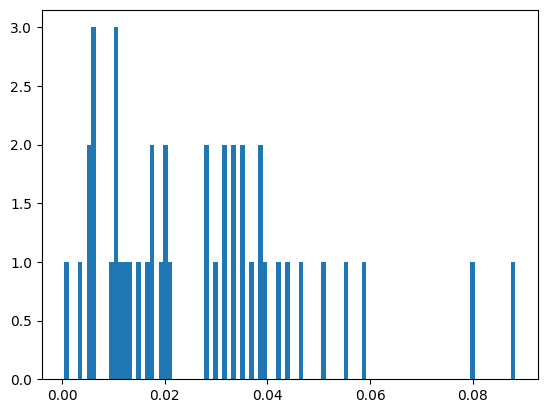

----------------------------------------------------------
RGG
- Average betweenness centrality: 0.022904680874051266
- Variance of betweenness centrality: 0.0007793514976706449


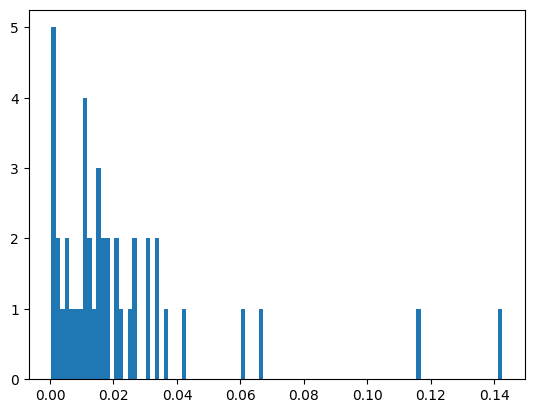

----------------------------------------------------------
SF
- Average betweenness centrality: 0.02533560219323124
- Variance of betweenness centrality: 0.0009030294088934944


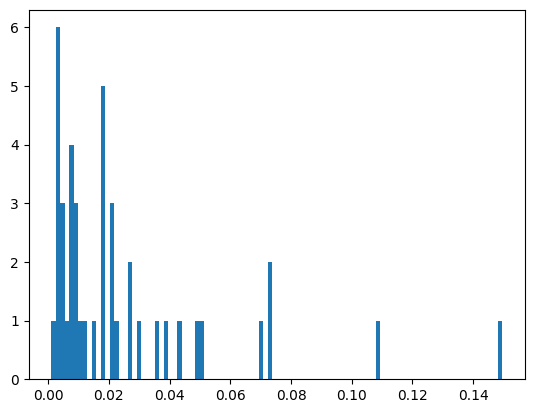

----------------------------------------------------------
SW
- Average betweenness centrality: 0.052967074521243544
- Variance of betweenness centrality: 0.0022974416730600833


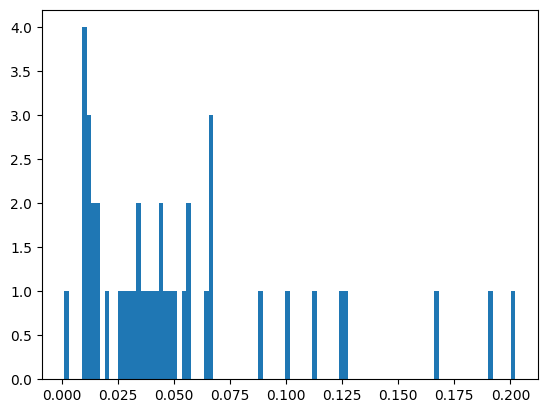

In [15]:
def find_betweenness(G):
    # calculate the betweenness of every node in G
    betweenness_centrality = nx.betweenness_centrality(G).values()
    plt.hist(betweenness_centrality, bins=100)

    # calculate the average betweenness and variance of the betweenness of every node in G
    average = np.mean(list(betweenness_centrality))
    variance = np.var(list(betweenness_centrality))
    return average, variance

for G in graphs:
    average, variance = find_betweenness(G)
    
    print(graphs[G])
    print("- Average betweenness centrality:", average)
    print("- Variance of betweenness centrality:", variance)
    plt.show()
    if G != SW:
        print("----------------------------------------------------------")

#### Results Review

- On the **REG** graph, all the nodes have the same betweenness centrality, equal to 0.12, since all of them have the same shortest paths due to the symmetry of the topology. The variance of the betweenness centrality is therefore equal to 0.

- On the **RGER** graph, the average betweenness centrality of the nodes is lower, around 0.027, while the variance is also low at 0.0004. This means that there is a small number of nodes that fall in the shortest paths connecting other pairs of nodes.

- On the **RGG** graph, the average betweenness centrality of the nodes is lower, around 0.023, with the variance being low as well, at 0.0008.

- On the **SF** graph, the average betweenness centrality of the nodes is low at around 0.025, with a low variance of 0.0009.

- On the **SW** graph, the average betweenness centrality of the nodes is higher than the RGER, RGG and SF graphs but lower than the REG graph, at around 0.053, while the variance stays low at around 0.0023.

### Γ4. Kεντρικότητα Katz
##### Γ4.1 Να αναπαρασταθεί η κατανομή της κεντρικότητας Katz των κόμβων για κάθε τοπολογία. 
Για τον προσδιορισμό της παραμέτρου $alpha$ της συνάρτησης katz_centrality,  να υπολογιστεί η μεγαλύτερη ιδιοτιμή $λ_{max}$ του πίνακα γειτνίασης με τη συνάρτηση adjacency_spectrum του networkx. 
H $alpha$ ορίζεται να είναι ιση με $\frac{1}{λ_{max}}-0.01$.
##### Γ4.2 Να υπολογιστεί η μέση  κεντρικότητα Katz  καθώς και η διασπορά της για κάθε τοπολογία.
##### Να σχολιαστούν τα αποτελέσματα.

REG
- Average Katz centrality: 0.1524985703326047
- Variance of Katz centrality: 7.703719777548943e-34


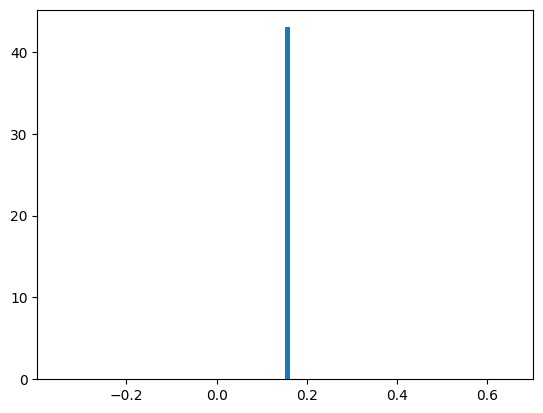

----------------------------------------------------------
RGER
- Average Katz centrality: 0.14492478745565418
- Variance of Katz centrality: 0.002252619934421833


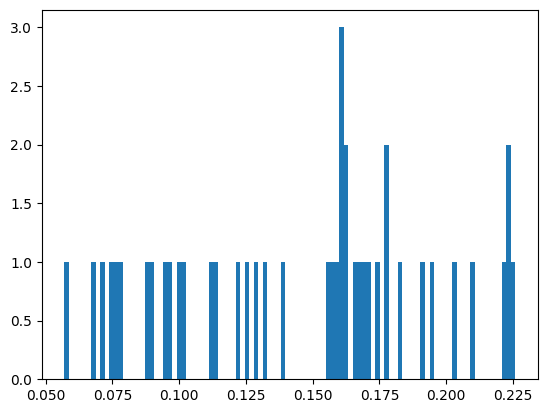

----------------------------------------------------------
RGG
- Average Katz centrality: 0.1399693667831795
- Variance of Katz centrality: 0.00366439031580414


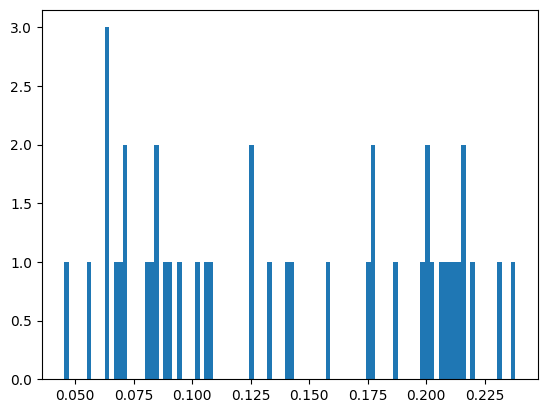

----------------------------------------------------------
SF
- Average Katz centrality: 0.13960885568229067
- Variance of Katz centrality: 0.0037651813685697093


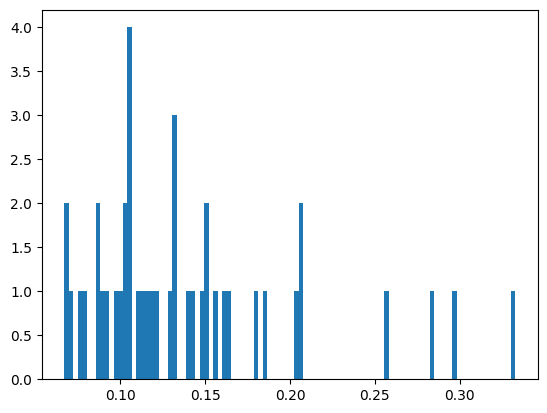

----------------------------------------------------------
SW
- Average Katz centrality: 0.14150114631210062
- Variance of Katz centrality: 0.0032332395458498707


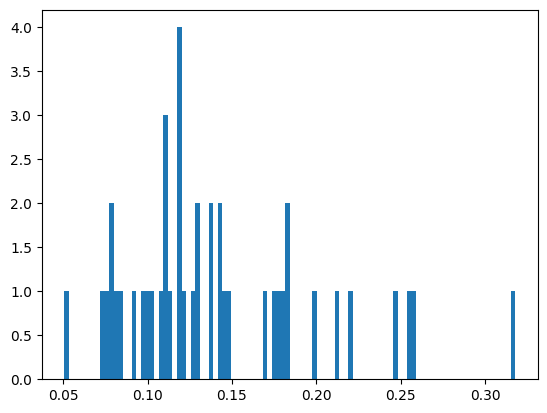

In [16]:
import warnings

with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.simplefilter("ignore")
    
    def find_katz(G):
        # calculate the Katz centrality of every node in G
        # alpha is equal to 1/lambda_max - 0.01, where lambda_max is the largest eigenvalue of the adjacency matrix of G
        alpha = float(1 / max(nx.adjacency_spectrum(G)) - 0.01)
        katz_centrality = nx.katz_centrality(G, alpha=alpha).values()
        plt.hist(katz_centrality, bins=100)
        
        # calculate the average Katz and variance of the Katz of every node in G
        average = np.mean(list(katz_centrality))
        variance = np.var(list(katz_centrality))
        return average, variance

    for G in graphs:
        average, variance = find_katz(G)
        
        print(graphs[G])
        print("- Average Katz centrality:", average)
        print("- Variance of Katz centrality:", variance)
        plt.show()
        if G != SW:
            print("----------------------------------------------------------")

#### Results Review

- On the **REG** graph, all the nodes have the same Katz centrality, equal to 0.15, most likely due to the symmetry of the topology, resulting in all the possible walks being the same for all nodes. The variance of the Katz centrality is therefore equal to 0.

- On the **RGER** graph, the average Katz centrality of the nodes is slightly lower, around 0.145, while the variance is also low at 0.002. This means these nodes belong in a small number of walks between a pair of other nodes.

- On the **RGG** graph, the average Katz centrality of the nodes is lower, around 0.14, with the variance being low as well, at 0.0037.

- On the **SF** graph, the average Katz centrality of the nodes is similar to the RGG graph, at 0.14, with a similar variance of 0.0038.

- On the **SW** graph, the average Katz centrality of the nodes is similar to the RGG and SF graphs, at around 0.14, while the variance stays low at around 0.0032.

#### Να προσδιοριστούν, για κάθε τοπολογία, οι πιο κεντρικοί κόμβοι ως προς το βαθμό, την εγγύτητα, την ενδιαμεσική κεντρικότητα και την κεντρικότητα Katz. Να σχολιαστούν τα αποτελέσματα.

In [17]:
import warnings

with warnings.catch_warnings():
    # ignore all caught warnings
    warnings.simplefilter("ignore")

    def find_central(G):
        alpha = float(1 / max(nx.adjacency_spectrum(G)) - 0.01)

        # calculate the node with the highest centrality in each of its four types
        degree = max(nx.degree_centrality(G), key=nx.degree_centrality(G).get)
        closeness = max(nx.closeness_centrality(G), key=nx.closeness_centrality(G).get)
        betweenness = max(nx.betweenness_centrality(G), key=nx.betweenness_centrality(G).get)
        katz = max(nx.katz_centrality(G, alpha=alpha), key=nx.katz_centrality(G, alpha=alpha).get)

        return degree, closeness, betweenness, katz

    for G in graphs:
        degree, closeness, betweenness, katz = find_central(G)
        
        print(graphs[G])
        print("- The node with the highest degree centrality is:", degree)
        print("- The node with the highest closeness centrality is:", closeness)
        print("- The node with the highest betweenness centrality is:", betweenness)
        print("- The node with the highest Katz centrality is:", katz)
        if G != SW:
            print("----------------------------------------------------------")

REG
- The node with the highest degree centrality is: 0
- The node with the highest closeness centrality is: 0
- The node with the highest betweenness centrality is: 10
- The node with the highest Katz centrality is: 0
----------------------------------------------------------
RGER
- The node with the highest degree centrality is: 13
- The node with the highest closeness centrality is: 13
- The node with the highest betweenness centrality is: 13
- The node with the highest Katz centrality is: 23
----------------------------------------------------------
RGG
- The node with the highest degree centrality is: 31
- The node with the highest closeness centrality is: 31
- The node with the highest betweenness centrality is: 31
- The node with the highest Katz centrality is: 31
----------------------------------------------------------
SF
- The node with the highest degree centrality is: 0
- The node with the highest closeness centrality is: 0
- The node with the highest betweenness centralit

#### Results Review

- On the **REG** graph, node 0 has the highest centrality of 3 of the 4 types, with node 10 taking over on the betweeness centrality, although this could be seen as a minor bug due to the least significant digits of the calculations. After all, for the REG graph we know that all nodes have equal centralities on all 4 types, so any node could be considered as the right answer.

- On the **RGER** graph, node 13 has the highest centrality of the first 3 types, while node 23 has the highest Katz centrality. This is due to Katz centrality being significantly different from the other 3 centralities and taking into account the number of walks between pairs of other nodes.

- On the **RGG** graph, node 31 has the highest centrality on all 4 types, which is expected when looking at it on the graph, as it has lot of connections, is between the 2 big clusters and probably belongs in a lot of walks between other nodes.

- On the **SF** graph, node 0 has the highest centrality on all 4 types.

- On the **SW** graph, node 4 has the highest centrality on the first 3 types, while node 13 has the highest Katz centrality. Node 13 seems like it has more connections that could help it achieve a higher Katz centrality due to the more possible walks between other nodes.

### Γ5. Αλγόριθμος PageRank σε πραγματικό δίκτυο
#####  Να εκτελεστεί ο αλγόριθμος pagerank στην 41η μεγαλύτερη συνδεδεμένη συνιστώσα (index=40) του κατευθυνόμενου δίκτυου web-Stanford του οποίου οι ακμές δίνονται στο αρχείο web-Stanford.txt. 
##### Για να υπολογίσετε τις συνδεδεμένες συνιστώσες, χρησιμοποιήστε τη συνάρτηση weakly_connected_components του networkx.
Περισσότερες πληροφορίες για το dataset δίνονται στο link https://snap.stanford.edu/data/web-Stanford.html.
##### Να σχολιαστούν τα αποτελέσματα.

In [18]:
G_web=nx.read_edgelist("resources/web-Stanford.txt",create_using=nx.DiGraph())

In [36]:
# find the 41st largest weakly connected component of the graph web-Stanford
components = sorted(nx.weakly_connected_components(G_web), key=len, reverse=True)
G40 = G_web.subgraph(components[40])

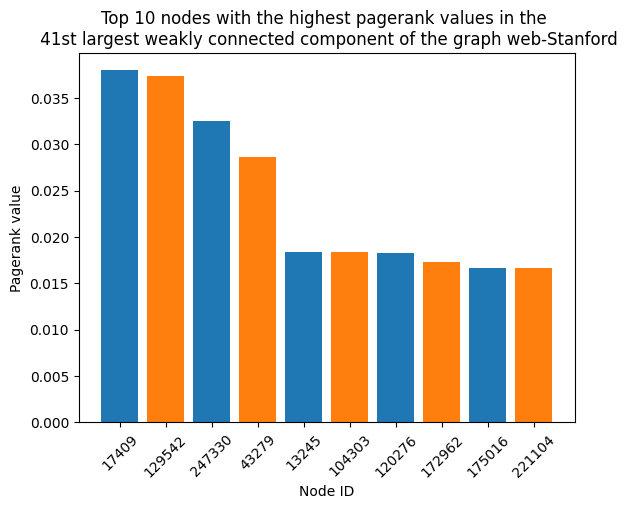

In [92]:
# pagerank
pr = nx.pagerank(G40, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)

# sort the pagerank dictionary by value
pr = sorted(pr.items(), key=lambda x: x[1], reverse=True)

# plot a bar chart of the top 10 nodes with the highest pagerank values
color = 5*['tab:blue', 'tab:orange']
plt.bar(range(10), [y for x, y in pr[:10]], color=color)
plt.xticks(range(10), [x for x, y in pr[:10]], rotation=45)
plt.title("Top 10 nodes with the highest pagerank values in the \n 41st largest weakly connected component of the graph web-Stanford")
plt.xlabel("Node ID")
plt.ylabel("Pagerank value")
plt.show()

#### Results Review

After selecting the 41st largest weakly connected component of the web-Stanford graph and running the **pagerank** algorithm on it, we have the top 10 nodes of that component with their respective normalized pagerank values. Those nodes are therefore deemed, based on the pagerank algorithm, as the most important nodes of the component, as these are the ones that users have a higher chance to be redirected to through other nodes.

### Δ) Μελέτη συνεκτικότητας και ευρωστία (robustness) δικτύων 

### Δ1. Μελέτη συνεκτικότητας
Για κάθε τύπο σύνθετου δικτύου, ορίζεται το ποσοστό συνεκτικότητας για έναν αριθμό παραγόμενων τοπολογιών, ως κλάσμα των συνδεδεμένων τοπολογιών σε σχέση με τον αριθμό όλων των παραγόμενων τοπολογιών.

Με βάση τις τιμές παραμέτρων του Πίνακα 2, μελετήστε τη συνεκτικότητα κάθε τύπου σύνθετου δικτύου του Πίνακα 1.

<table>
    <caption>Πίνακας 2</caption>
    <thead>
        <tr>
            <th>Τοπολογία</th>
            <th colspan=2>Εύρος Παραμέτρων</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>REG</td>
            <td rowspan=6>$n = \{100, 200\}$</td>
            <td>$d \in [2,10]$ με βήμα $2$</td>
        </tr>
        <tr>
            <td>RGER</td>
            <td>$M \in [100,800]$ με βήμα $100$</td>
        </tr>
        <tr>
            <td>RG-Gilbert</td>
            <td>$p \in [0.01,0.1]$ με βήμα $0.01$</td>
        </tr>
        <tr>
            <td>RGG</td>
            <td>$R \in [0.025,0.25]$ με βήμα $0.025$</td>
        </tr>
        <tr>
            <td>SF</td>
            <td>$d \in [2,10]$ με βήμα $2$</td>
        </tr>
        <tr>
            <td>SW</td>
            <td>$d \in [2,10]$ με βήμα $2$ και $g_p \in [0.1,0.7]$ με βήμα $0.1$</td>
        </tr>
    </tbody>
</table>

#### Δ1.1 Για κάθε έναν τύπο δικτύου, να παράξετε 100 διαφορετικές τοπολογίες και να παρουσιάσετε το διάγραμμα ποσοστού συνεκτικότητας σε σχέση με τις καθορισμένες παραμέτρους κάθε δικτύου.
#### Δ1.2 Σε ποιες περιπτώσεις εμφανίζονται φαινόμενα κατωφλίου;
#### Δ1.3 Ποιες είναι οι κρίσιμες τιμές για κάθε τύπο δικτύου οι οποίες οδηγούν σε μετάβαση φάσης (phase transitions);
#### Δ1.4 Ποιες μεταβάσεις φάσης είναι απότομες (sharp) και ποιες ομαλές (smooth);

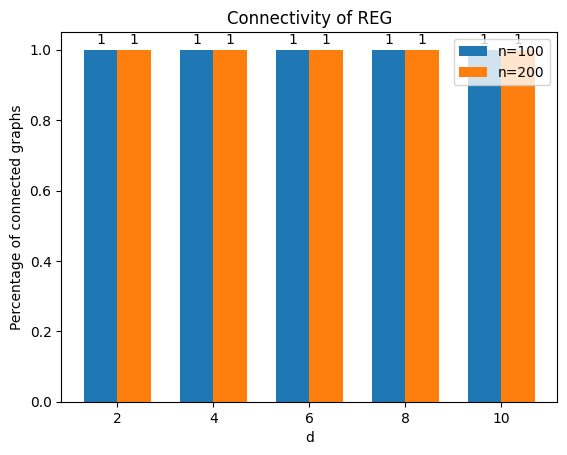

In [42]:
# array for d values to be tested and connectivity lists for n=100 and n=200
ds = np.arange(2, 12, 2)
first = []
second = []

for n in [100, 200]:
    for d in ds:
        connected = 0

        # create 100 random graphs with this n and d
        for i in range(100):
            G = nx.watts_strogatz_graph(n, d, 0, seed=i)
            
            # if the graph is connected, add 1 to the counter
            if nx.is_connected(G):
                connected += 1

        # calculate the percentage of connected graphs and append it to the respective connectivity list
        if n == 100:
            first.append(connected / 100)
        else:
            second.append(connected / 100)

# create a grouped bar chart
x = np.arange(len(ds))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, first, width, label='n=100')
rects2 = ax.bar(x + width/2, second, width, label='n=200')

ax.set_ylabel('Percentage of connected graphs')
ax.set_xlabel('d')
ax.set_title('Connectivity of REG')
ax.set_xticks(x, ds)
ax.legend()
ax.bar_label(rects1, padding=2)
ax.bar_label(rects2, padding=2)
plt.show()

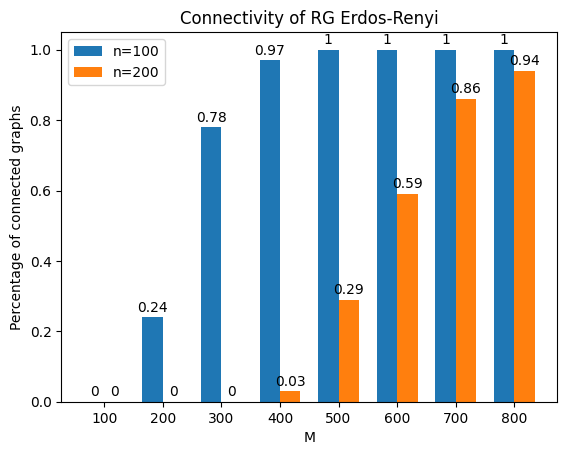

In [43]:
# array for M values to be tested and connectivity lists for n=100 and n=200
Ms = np.arange(100, 900, 100)
first = []
second = []

for n in [100, 200]:
    for M in Ms:
        connected = 0

        # create 100 random graphs with this n and M
        for i in range(100):
            G = nx.gnm_random_graph(n, M, seed=i)

            # if the graph is connected, add 1 to the counter
            if nx.is_connected(G):
                connected += 1

        # calculate the percentage of connected graphs and append it to the respective connectivity list
        if n == 100:
            first.append(connected / 100)
        else:
            second.append(connected / 100)

# create a grouped bar chart
x = np.arange(len(Ms))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, first, width, label='n=100')
rects2 = ax.bar(x + width/2, second, width, label='n=200')

ax.set_ylabel('Percentage of connected graphs')
ax.set_xlabel('M')
ax.set_title('Connectivity of RG Erdos-Renyi')
ax.set_xticks(x, Ms)
ax.legend()
ax.bar_label(rects1, padding=2)
ax.bar_label(rects2, padding=2)
plt.show()

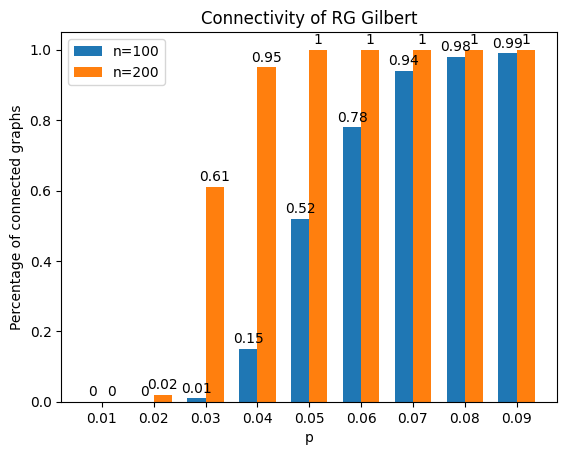

In [50]:
# array for p values to be tested and connectivity lists for n=100 and n=200
ps = np.around(np.arange(0.01, 0.1, 0.01), 2)
first = []
second = []

for n in [100, 200]:
    for p in ps:
        connected = 0

        # create 100 random graphs with this n and p
        for i in range(100):
            G = nx.gnp_random_graph(n, p, seed=i)

            # if the graph is connected, add 1 to the counter
            if nx.is_connected(G):
                connected += 1

        # calculate the percentage of connected graphs and append it to the respective connectivity list
        if n == 100:
            first.append(connected / 100)
        else:
            second.append(connected / 100)

# create a grouped bar chart
x = np.arange(len(ps))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, first, width, label='n=100')
rects2 = ax.bar(x + width/2, second, width, label='n=200')

ax.set_ylabel('Percentage of connected graphs')
ax.set_xlabel('p')
ax.set_title('Connectivity of RG Gilbert')
ax.set_xticks(x, ps)
ax.legend()
ax.bar_label(rects1, padding=2)
ax.bar_label(rects2, padding=2)
plt.show()

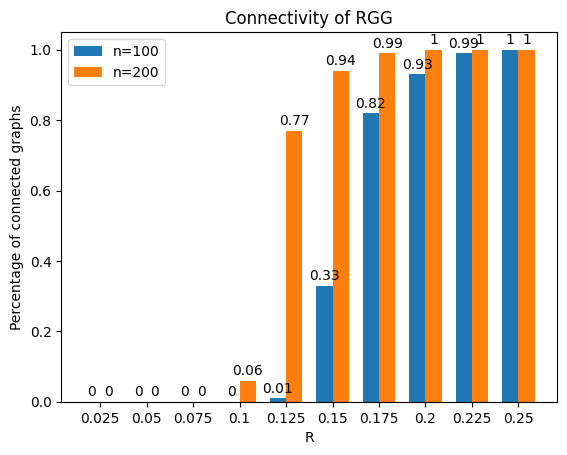

In [52]:
# array for R values to be tested and connectivity lists for n=100 and n=200
Rs = np.around(np.arange(0.025, 0.275, 0.025), 3)
first = []
second = []

for n in [100, 200]:
    for R in Rs:
        connected = 0

        # create 100 random graphs with this n and R
        for i in range(100):
            G = nx.random_geometric_graph(n, R, seed=i)

            # if the graph is connected, add 1 to the counter
            if nx.is_connected(G):
                connected += 1

        # calculate the percentage of connected graphs and append it to the respective connectivity list
        if n == 100:
            first.append(connected / 100)
        else:
            second.append(connected / 100)

# create a grouped bar chart
x = np.arange(len(Rs))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, first, width, label='n=100')
rects2 = ax.bar(x + width/2, second, width, label='n=200')

ax.set_ylabel('Percentage of connected graphs')
ax.set_xlabel('R')
ax.set_title('Connectivity of RGG')
ax.set_xticks(x, Rs)
ax.legend()
ax.bar_label(rects1, padding=2)
ax.bar_label(rects2, padding=2)
plt.show()

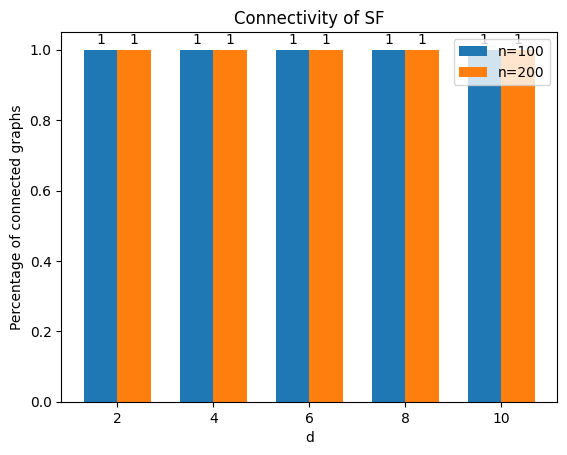

In [53]:
# array for d values to be tested and connectivity lists for n=100 and n=200
ds = np.arange(2, 12, 2)
first = []
second = []

for n in [100, 200]:
    for d in ds:
        connected = 0

        # create 100 random graphs with this n and d
        for i in range(100):
            G = nx.barabasi_albert_graph(n, d, seed=i)

            # if the graph is connected, add 1 to the counter
            if nx.is_connected(G):
                connected += 1

        # calculate the percentage of connected graphs and append it to the respective connectivity list
        if n == 100:
            first.append(connected / 100)
        else:
            second.append(connected / 100)

# create a grouped bar chart
x = np.arange(len(ds))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, first, width, label='n=100')
rects2 = ax.bar(x + width/2, second, width, label='n=200')

ax.set_ylabel('Percentage of connected graphs')
ax.set_xlabel('d')
ax.set_title('Connectivity of SF')
ax.set_xticks(x, ds)
ax.legend()
ax.bar_label(rects1, padding=2)
ax.bar_label(rects2, padding=2)
plt.show()

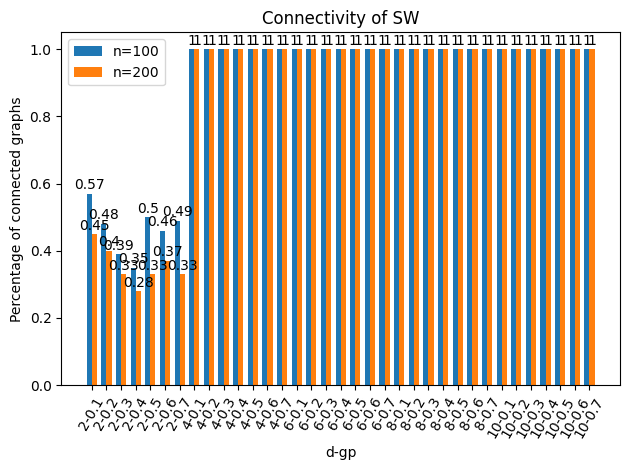

In [125]:
# array for d and gp values to be tested and connectivity lists for n=100 and n=200
ds = np.arange(2, 12, 2)
gps = np.around(np.arange(0.1, 0.8, 0.1), 1)
first = []
second = []

for n in [100, 200]:
    for d in ds:
        for gp in gps:
            connected = 0

            # create 100 random graphs with this n, d and gp
            for i in range(100):
                G = nx.watts_strogatz_graph(n, d, gp, seed=i)

                # if the graph is connected, add 1 to the counter
                if nx.is_connected(G):
                    connected += 1

            # calculate the percentage of connected graphs and append it to the respective connectivity list
            if n == 100:
                first.append(connected / 100)
            else:
                second.append(connected / 100)

# create a grouped bar chart
x = np.arange(len(ds)*len(gps))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, first, width, label='n=100')
rects2 = ax.bar(x + width/2, second, width, label='n=200')

ax.set_ylabel('Percentage of connected graphs')
ax.set_xlabel('d-gp')
ax.set_title('Connectivity of SW')
ax.set_xticks(x, [str(d) + '-' + str(gp) for d in ds for gp in gps])
ax.legend()
ax.bar_label(rects1, padding=1)
ax.bar_label(rects2, padding=1)
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

### Δ2. Μελέτη ευρωστίας δικτύου

#### Για κάθε μια από τις τοπολογίες REG, RG(ER), RGG, SF(BA) και SW(WS) που εξετάστηκαν στις ενότητες Β και Γ, να υπολογιστεί με τη συνάρτηση minimum_node_cut ο ελάχιστος αριθμός κόμβων που πρέπει να αφαιρεθούν για να προκύψει μη συνδεδεμένο δίκτυο. 
#### Να σχολιαστούν τα αποτελέσματα.

In [27]:
def find_cut(G):
    # calculate the length of the minimum cut of G
    return len(nx.minimum_node_cut(G))

for G in graphs:
    minimum = find_cut(G)

    print(graphs[G])
    print("- The minimum number of nodes needed to disconnect the graph is:", minimum)
    if G != SW:
        print("----------------------------------------------------------")

REG
- The minimum number of nodes needed to disconnect the graph is: 4
----------------------------------------------------------
RGER
- The minimum number of nodes needed to disconnect the graph is: 3
----------------------------------------------------------
RGG
- The minimum number of nodes needed to disconnect the graph is: 4
----------------------------------------------------------
SF
- The minimum number of nodes needed to disconnect the graph is: 4
----------------------------------------------------------
SW
- The minimum number of nodes needed to disconnect the graph is: 2


### E) Μελέτη της εξελικτικής μετατροπής δικτύου REG σε δίκτυο SW και RGER

##### Μεταβάλλοντας την παράμετρο $g_p$ από $0$ έως $1$ με βήμα $0.1$ της συνάρτησης που κατασκευάζει τοπολογίες SW μεγέθους $n=30x$ ( αντικαταστήστε το x με το τελευταίο ψηφίο του ΑΜ) με βαθμό αρχικού πλέγματος $d=4$, να βρείτε το μέσο μήκος μονοπατιού και το μέσο συντελεστή ομαδοποίησης. Πώς συμπεριφέρεται το παραγόμενο δίκτυο για $g_p = 0$, πώς για $g_p = 1$ και πώς για ενδιάμεσες τιμές $g_p \simeq 0.1 - 0.5$;

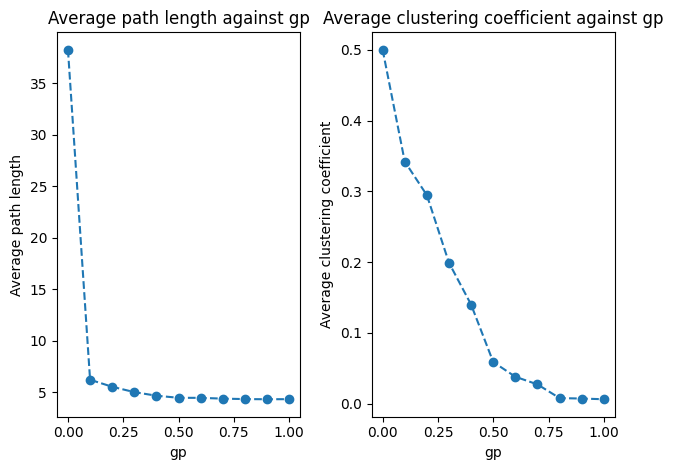

In [126]:
random.seed(seedno)
n=303
d=4

gps = np.around(np.arange(0, 1.1, 0.1), 1)
average_paths = []
average_ccs = []

for gp in gps:
    G = nx.watts_strogatz_graph(n, d, gp)

    # calculate average path length and average clustering coefficient
    average_paths.append(nx.average_shortest_path_length(G))
    average_ccs.append(nx.average_clustering(G))

# plot the average path length against gp
plt.subplot(1, 2, 1)
plt.plot(gps, average_paths, 'o--')
plt.xlabel('gp')
plt.ylabel('Average path length')
plt.title('Average path length against gp')

# plot the average clustering coefficient against gp
plt.subplot(1, 2, 2)
plt.plot(gps, average_ccs, 'o--')
plt.xlabel('gp')
plt.ylabel('Average clustering coefficient')
plt.title('Average clustering coefficient against gp')

plt.tight_layout()
plt.show()

### Z) Αναγνώριση τύπου πραγματικού δικτύου 
##### Για το πραγματικό δίκτυο που δίνεται στο αρχείο got.txt  και αφορά στις αλληλεπιδράσεις των χαρακτήρων του Game of Thrones στον πρώτο κύκλο επεισοδίων (https://github.com/mathbeveridge/gameofthrones) να βρεθούν:</p>
<ol>
    <li>Η κατανομή του βαθμού κόμβου και ο μέσος βαθμός.</li>
    <li>Η κατανομή του συντελεστή ομαδοποίησης και ο μέσος συντελεστής ομαδοποίησης.</li>
    <li>Το μέσο μήκος μονοπατιού.</li>
</ol>
<p style=text-align:justify>Να οπτικοποιηθεί το δίκτυο. Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο της τοπολογίας με βάση τους τύπους δικτύων που εξετάστηκαν στις ενότητες B, Γ.</p>

- Average degree centrality: 0.06971428571428569


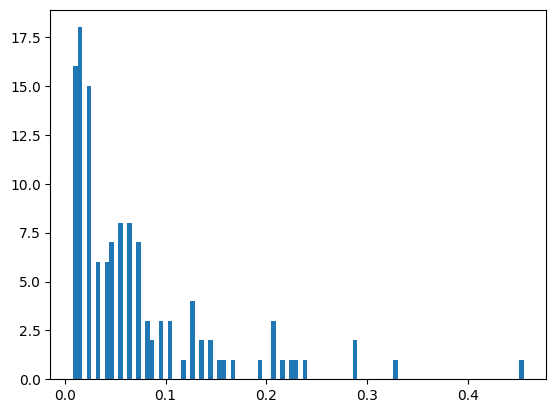

---------------------------------------------
- Average clustering coefficient: 0.6296612631071081


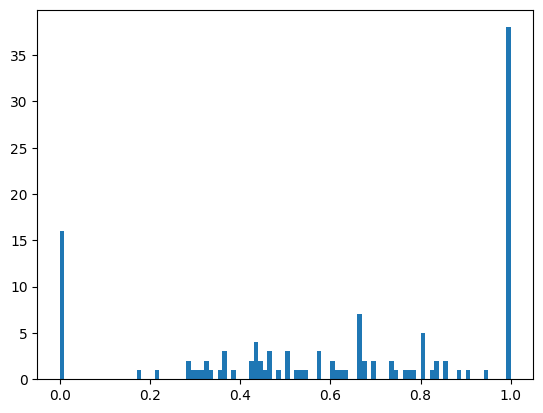

---------------------------------------------
- Average path length: 2.6446984126984128
---------------------------------------------


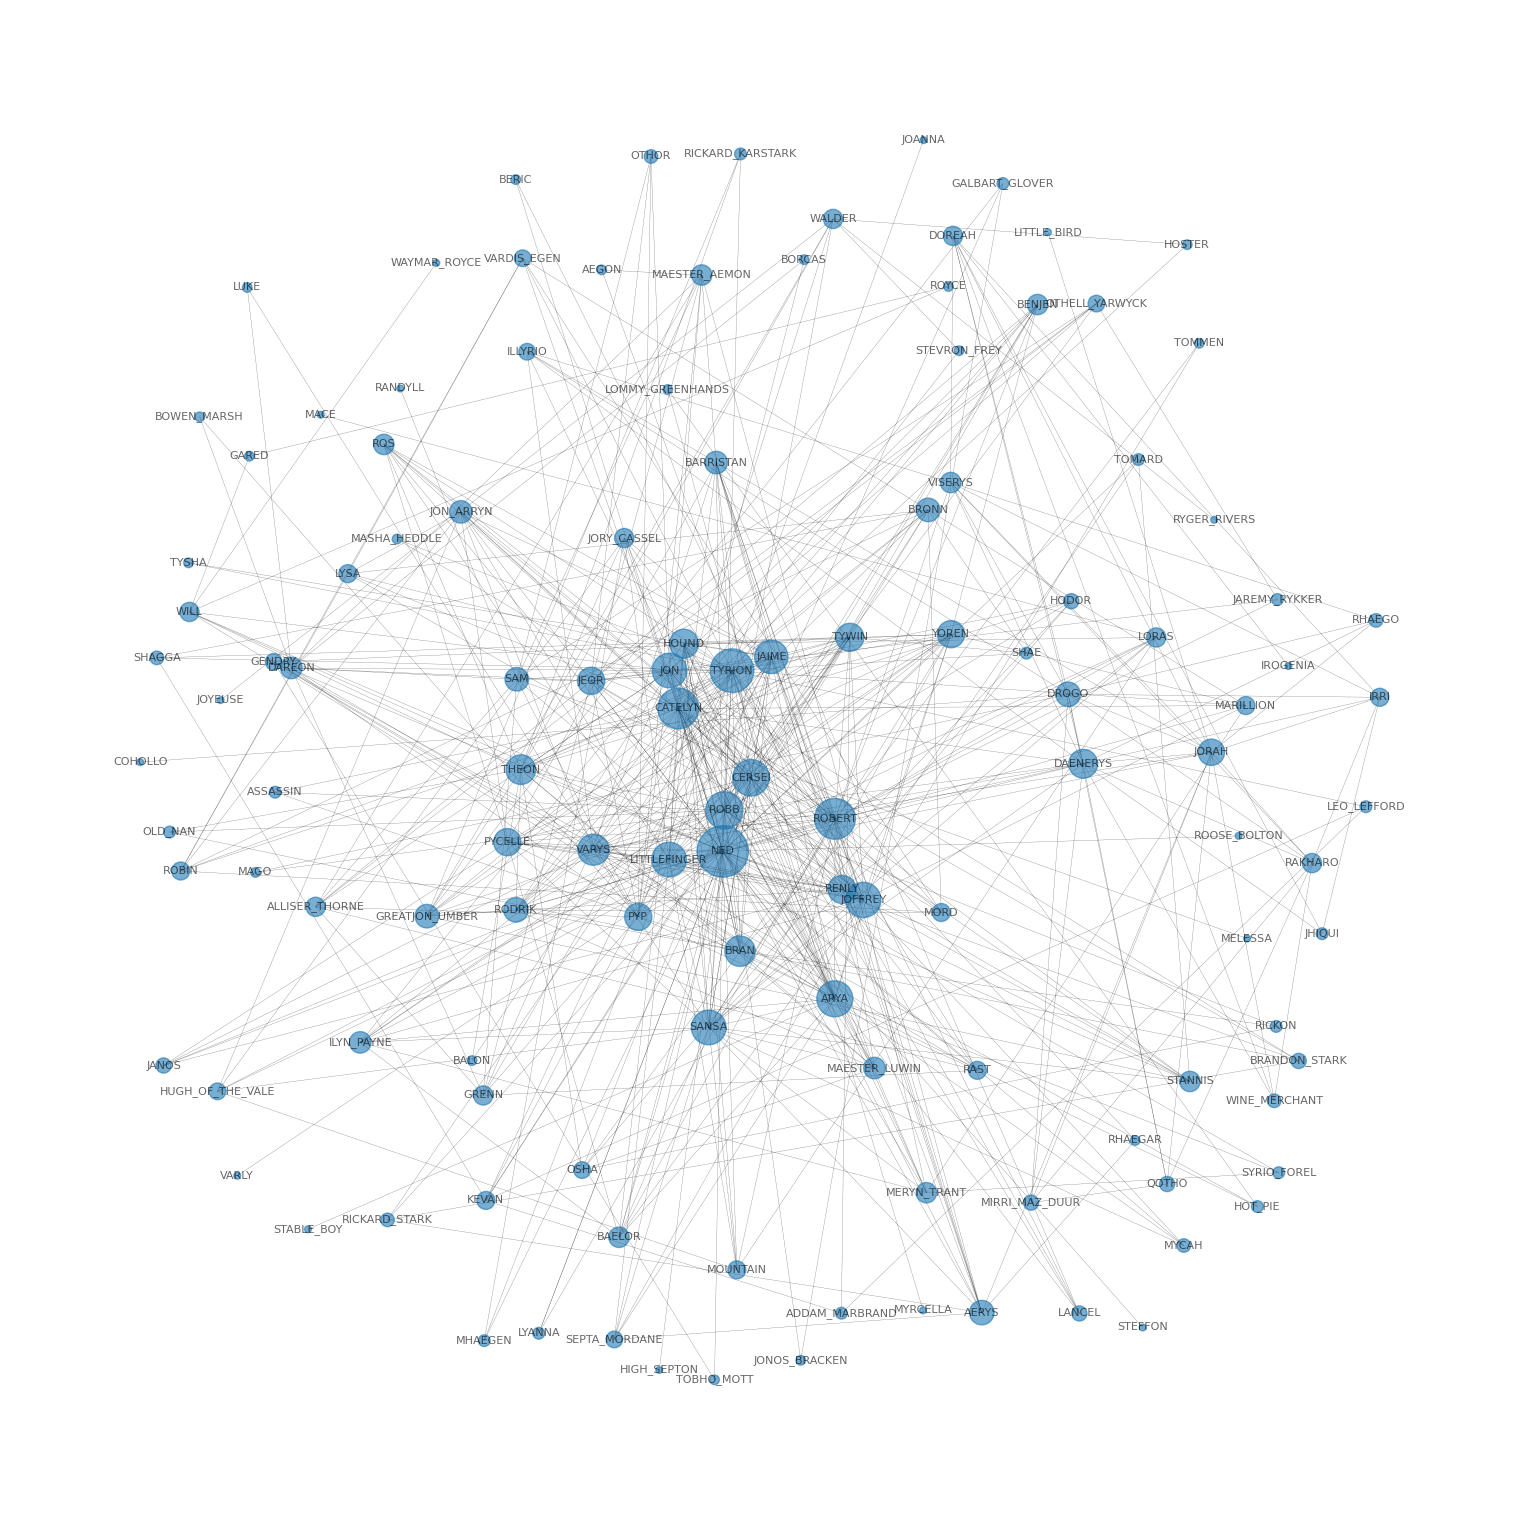

In [190]:
import csv

# the graph of the GOT characters
G_got=nx.Graph()

# read csv and add nodes and edges to the graph
with open('resources/got.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    
    for row in csv_reader:
            G_got.add_edge(row[0],row[1],weight=row[2])
            line_count += 1

# calculate the degree centrality of the graph and its average
average, variance = find_degree(G_got)
print("- Average degree centrality:", average)
plt.show()
print("---------------------------------------------")

# calculate the clustering coefficients of the graph and its average
avg_cc, var_cc, min_cc, min_nodes, max_cc, max_nodes = cc(G_got)
print("- Average clustering coefficient:", avg_cc)
plt.show()
print("---------------------------------------------")

# calculate the average path length of the graph
average_path = nx.average_shortest_path_length(G_got)
print("- Average path length:", average_path)
print("---------------------------------------------")

# draw G_got with the node size proportional to its degree centrality
plt.figure(figsize=(15,15))
pos = nx.spring_layout(G_got, k=1, iterations=15)
nx.draw(G_got, pos, node_size=[v*3000 for v in nx.degree_centrality(G_got).values()], with_labels=True, font_size=8, width=0.2, alpha=0.6)
plt.show()

#### Ποιοι ήταν οι 5 κεντρικότεροι χαρακτήρες του πρώτου κύκλου επεισοδίων ως προς το βαθμό, την εγγύτητα και την ενδιαμεσικότητα ? 

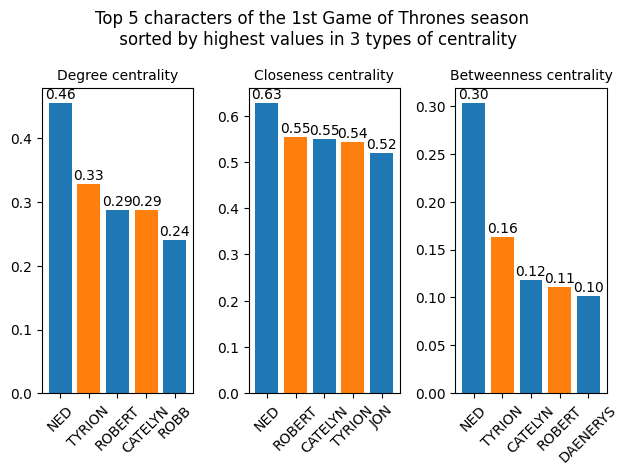

In [234]:
# sort the centrality dictionaries by value
degree = sorted(nx.degree_centrality(G_got).items(), key=lambda x: x[1], reverse=True)
closeness = sorted(nx.closeness_centrality(G_got).items(), key=lambda x: x[1], reverse=True)
betweenness = sorted(nx.betweenness_centrality(G_got).items(), key=lambda x: x[1], reverse=True)

dictionaries = [(degree, "Degree"), (closeness, "Closeness"), (betweenness, "Betweenness")]
color = 3*['tab:blue', 'tab:orange']

# plot the top 5 characters for each centrality type
for d in dictionaries:
    plt.subplot(1, 3, dictionaries.index(d)+1)
    plt.title(d[1] + " centrality", fontdict={'fontsize': 10})
    plt.bar(range(5), [x[1] for x in d[0][:5]], color=color)
    plt.xticks(range(5), [x[0] for x in d[0][:5]], rotation=45)
    plt.bar_label(plt.gca().containers[0], padding=1, fmt='%.2f')

plt.suptitle("Top 5 characters of the 1st Game of Thrones season \n sorted by highest values in 3 types of centrality")
plt.tight_layout()
plt.show()